In [0]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,BatchNormalization
model = Sequential()
model.add(LSTM(800, return_sequences=True,
               input_shape=(1, 10)))  
model.add(BatchNormalization())  
model.add(LSTM(800))  
model.add(BatchNormalization())
model.add(Dense(20, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 800)            2595200   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 800)            3200      
_________________________________________________________________
lstm_4 (LSTM)                (None, 800)               5123200   
_________________________________________________________________
batch_normalization_4 (Batch (None, 800)               3200      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                16020     
Total params: 7,740,820
Trainable params: 7,737,620
Non-trainable params: 3,200
_________________________________________________________________


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
f = open('/content/drive/My Drive/data_enc.txt', 'r')
x = f.readlines()
f.close()
p=[]
q=[]

for i in x:
  for j in i:
    if(j!='\n' and j!=' '):
      p.append(int(j))
  if(p):
    p=np.array(p)
    q.append(p)
  p=[]
      
    
    
q=np.array(q)
print(q.shape)
print(type(q[1][2]))

q=q.reshape(500,1,10)
print(q.shape)

f = open('/content/drive/My Drive/code_enc.txt', 'r')
x = f.readlines()
f.close()

l=[]
m=[]

#print(x)

for i in x:
  for j in i:
    if(j!='\n' and j!=' '):
      l.append(int(j))
  if(l):
    l=np.array(l)
    m.append(l)
  l=[]
      

m=np.array(m)
print(m.shape)

(500, 10)
<class 'numpy.int64'>
(500, 1, 10)
(500, 20)


In [0]:
history=model.fit(x=q, y=m, batch_size=10, epochs=50, verbose=1, validation_split=0.2 ,shuffle=True)

Train on 400 samples, validate on 100 samples
Epoch 1/50
400/400 [==============================] - 3s 8ms/step - loss: 0.8914 - acc: 0.5998 - val_loss: 0.7331 - val_acc: 0.6470
Epoch 2/50
400/400 [==============================] - 1s 4ms/step - loss: 0.5849 - acc: 0.6744 - val_loss: 0.6538 - val_acc: 0.6775
Epoch 3/50
400/400 [==============================] - 1s 3ms/step - loss: 0.5276 - acc: 0.7099 - val_loss: 0.6074 - val_acc: 0.6830
Epoch 4/50
400/400 [==============================] - 1s 3ms/step - loss: 0.4795 - acc: 0.7346 - val_loss: 0.5345 - val_acc: 0.7250
Epoch 5/50
400/400 [==============================] - 1s 3ms/step - loss: 0.4530 - acc: 0.7616 - val_loss: 0.5131 - val_acc: 0.7400
Epoch 6/50
400/400 [==============================] - 1s 3ms/step - loss: 0.4329 - acc: 0.7722 - val_loss: 0.4746 - val_acc: 0.7580
Epoch 7/50
400/400 [==============================] - 1s 3ms/step - loss: 0.4108 - acc: 0.7867 - val_loss: 0.4712 - val_acc: 0.7610
Epoch 8/50
400/400 [==========

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


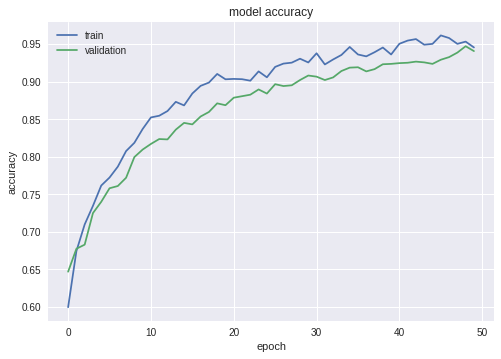

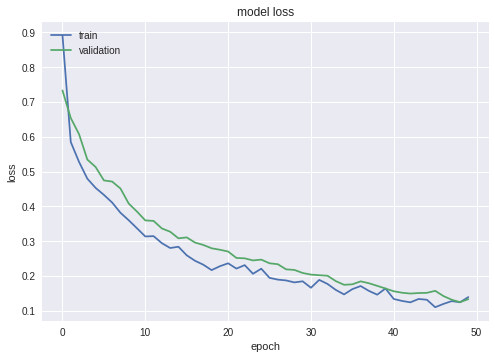

In [0]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
model.evaluate(x=q,y=m,batch_size=10)

500/500 [==============================] - 0s 632us/step


[0.039142043683677914, 0.9877000021934509]

In [0]:
var = model.predict(q)
print(var)

[[1.78813934e-07 5.96046448e-08 1.64806843e-05 ... 2.96008587e-03
  9.95208859e-01 9.57081437e-01]
 [1.00000000e+00 9.99999940e-01 9.99970138e-01 ... 2.44462192e-02
  2.19158858e-01 9.49615896e-01]
 [9.99997675e-01 9.99993563e-01 1.08510256e-04 ... 9.98839140e-01
  9.46517229e-01 1.77335441e-02]
 ...
 [7.74860382e-07 4.76837158e-07 9.99973476e-01 ... 1.12356246e-02
  9.70819712e-01 4.99334931e-02]
 [3.51667404e-06 2.08616257e-07 9.99941707e-01 ... 9.98617411e-01
  1.12425685e-01 5.13090789e-02]
 [8.94069672e-08 5.06639481e-07 7.18832016e-05 ... 9.96177554e-01
  4.21466529e-02 2.63972163e-01]]


In [0]:
print(var.shape)

(500, 20)


In [0]:
import math
ber=0.0
e=[]
enc_bits=[]
av_ber=0.0
for x in range(500):
  for y in range(20):
    if(var[x][y]<0.5):
      a=0
    else:
      a=1
    e.append(a)
    if(m[x][y]!=a):
      ber=ber+1
  enc_bits.append(np.array(e))
  e=[]
  av_ber=av_ber+ber/20
  #print(av_ber)
  ber=0.0
  
av_ber=av_ber/500
print(math.log(av_ber))

enc_bits=np.array(enc_bits)
enc_bits=enc_bits.reshape(500,1,20)

-4.398156016603766


In [0]:
model = Sequential()
model.add(LSTM(800, return_sequences=True,
               input_shape=(1, 20)))  
model.add(BatchNormalization())  
model.add(LSTM(800))  
model.add(BatchNormalization())
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 800)            2627200   
_________________________________________________________________
batch_normalization_5 (Batch (None, 1, 800)            3200      
_________________________________________________________________
lstm_6 (LSTM)                (None, 800)               5123200   
_________________________________________________________________
batch_normalization_6 (Batch (None, 800)               3200      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 7,764,810
Trainable params: 7,761,610
Non-trainable params: 3,200
_________________________________________________________________


In [0]:
q=q.reshape(500,10)

In [0]:
history=0
history=model.fit(x=enc_bits, y=q, batch_size=10, epochs=50, verbose=1, validation_split=0.2 ,shuffle=True)

Train on 400 samples, validate on 100 samples
Epoch 1/50
400/400 [==============================] - 1s 3ms/step - loss: 0.0311 - acc: 0.9875 - val_loss: 0.4843 - val_acc: 0.9160
Epoch 2/50
400/400 [==============================] - 1s 3ms/step - loss: 0.0330 - acc: 0.9877 - val_loss: 0.4775 - val_acc: 0.9230
Epoch 3/50
400/400 [==============================] - 1s 3ms/step - loss: 0.0397 - acc: 0.9852 - val_loss: 0.4601 - val_acc: 0.9220
Epoch 4/50
400/400 [==============================] - 1s 3ms/step - loss: 0.0451 - acc: 0.9835 - val_loss: 0.4341 - val_acc: 0.9240
Epoch 5/50
400/400 [==============================] - 1s 3ms/step - loss: 0.0477 - acc: 0.9782 - val_loss: 0.4182 - val_acc: 0.9220
Epoch 6/50
400/400 [==============================] - 1s 3ms/step - loss: 0.0480 - acc: 0.9792 - val_loss: 0.4272 - val_acc: 0.9240
Epoch 7/50
400/400 [==============================] - 1s 3ms/step - loss: 0.0493 - acc: 0.9797 - val_loss: 0.4384 - val_acc: 0.9270
Epoch 8/50
400/400 [==========

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


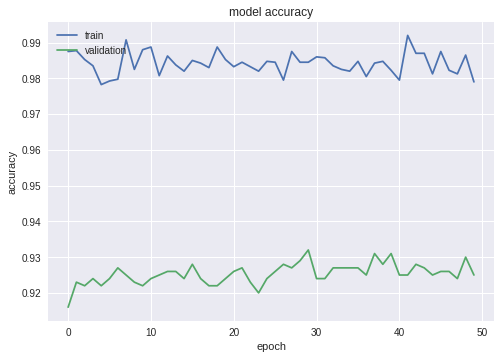

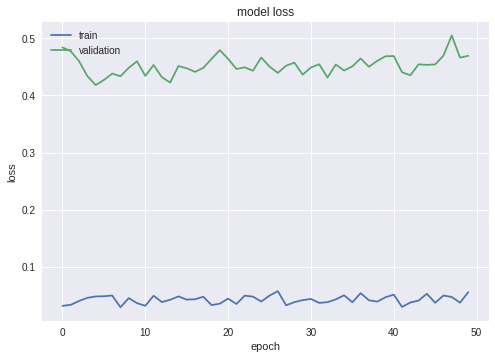

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
model.evaluate(x=enc_bits , y=q, batch_size=10)


500/500 [==============================] - 0s 646us/step


[0.0940339513670915, 0.9849999952316284]

In [0]:
ans=model.predict(enc_bits)
print(ans)

[[5.3644180e-06 1.4901161e-07 1.0000000e+00 ... 9.9999928e-01
  9.9997771e-01 9.9998325e-01]
 [1.0000000e+00 8.9406967e-08 2.9802322e-08 ... 5.7935715e-05
  1.0585785e-04 1.3533235e-03]
 [1.0000000e+00 9.9999905e-01 7.1525574e-07 ... 7.8797340e-05
  9.9999994e-01 6.7949295e-06]
 ...
 [1.8477440e-06 1.0000000e+00 5.0663948e-07 ... 6.3866377e-05
  3.9935112e-06 9.9999720e-01]
 [1.0728836e-06 9.9999988e-01 9.9999571e-01 ... 7.7486038e-07
  1.5646219e-05 9.9999237e-01]
 [0.0000000e+00 0.0000000e+00 9.9999964e-01 ... 4.3213367e-06
  9.9999654e-01 1.3917685e-05]]
